Imports



In [8]:
pip install kagglehub --quiet

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd 
import kagglehub as kh
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Download latest version
path = kagglehub.dataset_download("shayanfazeli/heartbeat")

print("Path to dataset files:", path)

100%|██████████| 98.8M/98.8M [00:02<00:00, 35.7MB/s]

Extracting files...


Path to dataset files: C:\Users\hawra\.cache\kagglehub\datasets\shayanfazeli\heartbeat\versions\1


In [44]:
def load_data(path):
    normal = pd.read_csv(os.path.join(path, "ptbdb_normal.csv"), header=None)
    abnormal = pd.read_csv(os.path.join(path, "ptbdb_abnormal.csv"), header=None)
    return normal, abnormal

# Call the function
normal, abnormal = load_data(path)


In [45]:
head = normal.head()
print("First 5 rows of normal data:\n", head)

First 5 rows of normal data:
         0         1         2         3         4         5         6    \
0  1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.

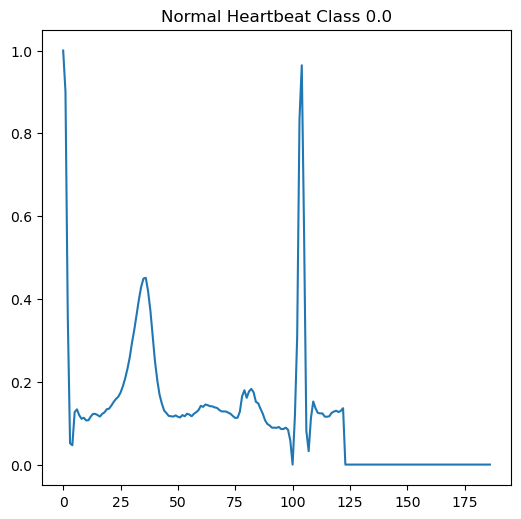

In [46]:
classes = normal.iloc[:, -1].unique()
plt.figure(figsize=(15, 10))
for i, cls in enumerate(classes):
    plt.subplot(2, 3, i + 1)
    sample = normal[normal.iloc[:, -1] == cls].iloc[0, :-1]
    plt.plot(sample.values)
    plt.title(f"Normal Heartbeat Class {cls}")
plt.tight_layout()
plt.show()


In [38]:
head = abnormal.head()
print("First 5 rows of abnormal data:\n", head)

First 5 rows of abnormal data:
         0         1         2         3         4         5         6    \
0  0.932233  0.869679  0.886186  0.929626  0.908775  0.933970  0.801043   
1  1.000000  0.606941  0.384181  0.254237  0.223567  0.276836  0.253430   
2  1.000000  0.951613  0.923963  0.853303  0.791859  0.734255  0.672043   
3  0.977819  0.899261  0.230129  0.032348  0.142329  0.223660  0.328096   
4  0.935618  0.801661  0.805815  1.000000  0.722741  0.480789  0.454829   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.749783  0.687229  0.635100  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.184826  0.153349  0.121872  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.685100  0.670507  0.667435  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.367837  0.381701  0.389094  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.319834  0.266874  0.308411  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  1.0  
1  0.0  

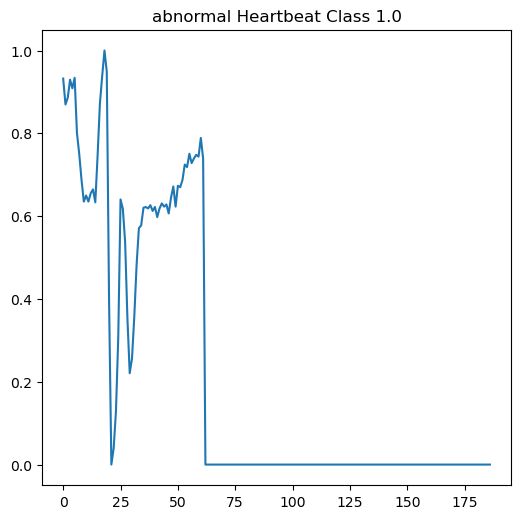

In [48]:
classes = abnormal.iloc[:, -1].unique()
plt.figure(figsize=(15, 10))
for i, cls in enumerate(classes):
    plt.subplot(2, 3, i + 1)
    sample = abnormal[abnormal.iloc[:, -1] == cls].iloc[0, :-1]
    plt.plot(sample.values)
    plt.title(f"abnormal Heartbeat Class {cls}")
plt.tight_layout()
plt.show()

In [31]:
def load_data(path):
    # Load CSVs
    normal = pd.read_csv(os.path.join(path, "ptbdb_normal.csv"), header=None)
    abnormal = pd.read_csv(os.path.join(path, "ptbdb_abnormal.csv"), header=None)

    # Combine them
    data = pd.concat([normal, abnormal], ignore_index=True)

    # Split features and labels (last column is label)
    X = data.iloc[:, :-1]  # all columns except last
    y = data.iloc[:, -1]   # last column is label

    return X, y

In [32]:
X, y = load_data(path)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)
print("Label distribution:\n", y.value_counts())

Features shape: (14552, 187)
Labels shape: (14552,)
Label distribution:
 187
1.0    10506
0.0     4046
Name: count, dtype: int64


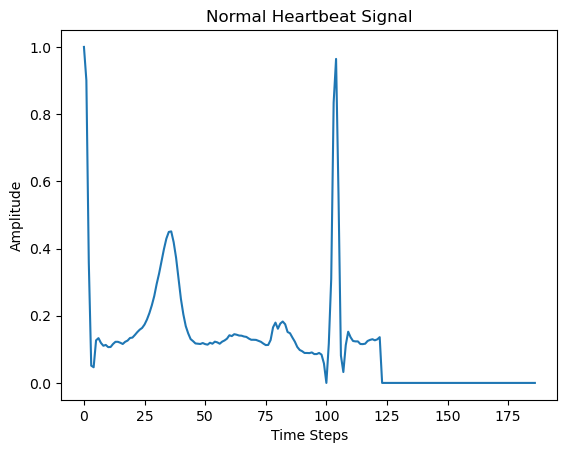

In [33]:
# Plot a normal heartbeat
plt.plot(X.iloc[0])
plt.title("Normal Heartbeat Signal")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.show()

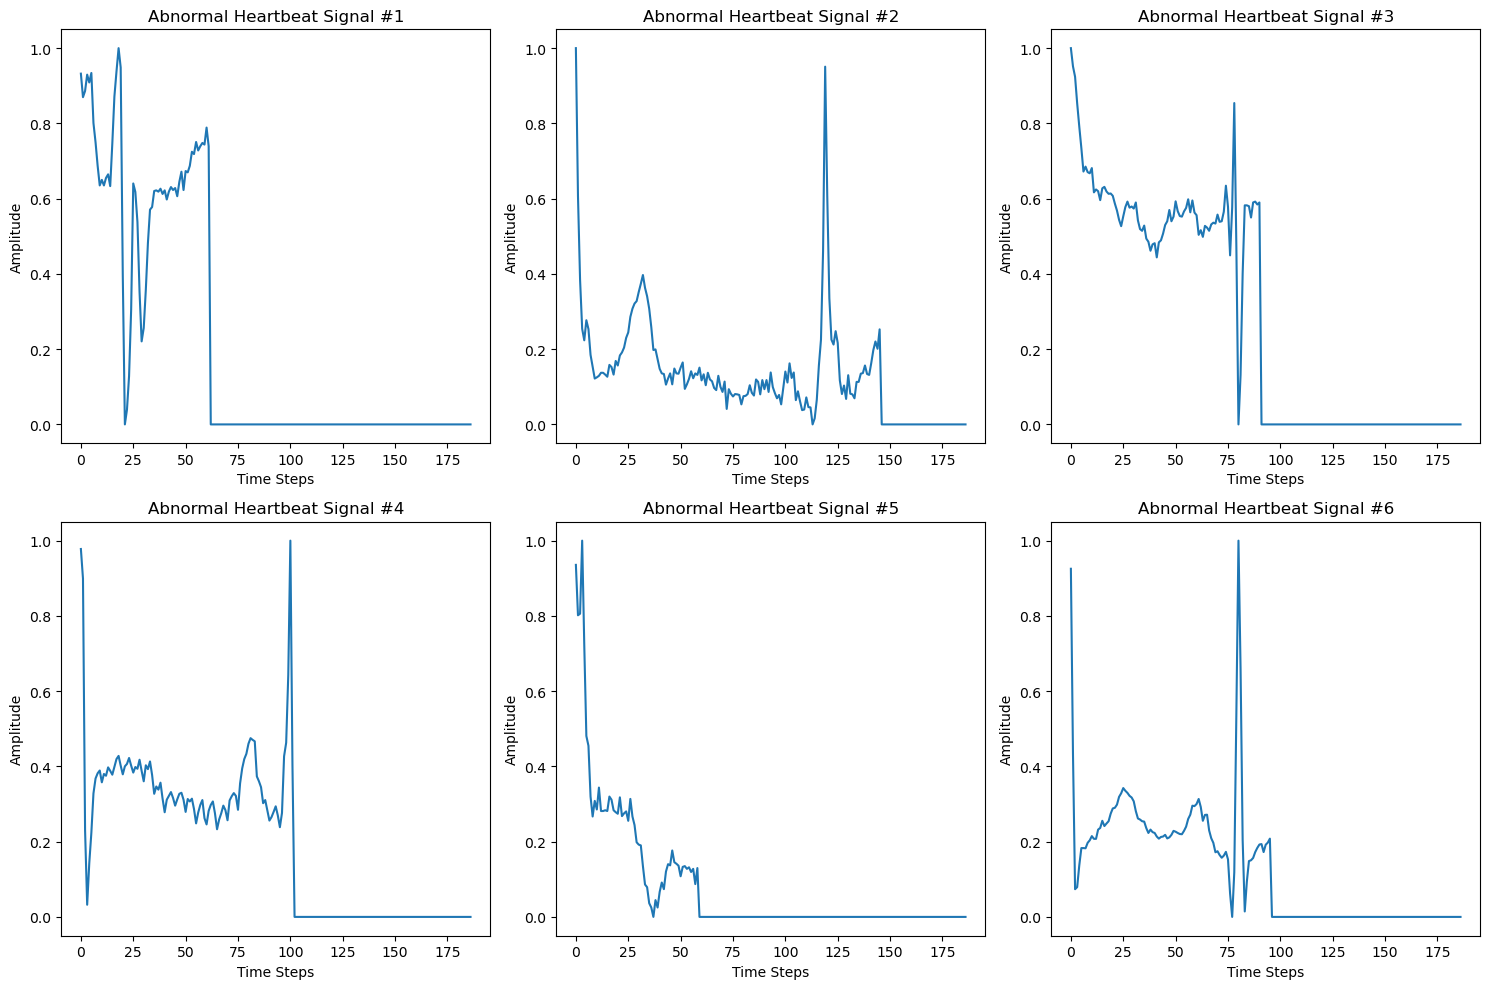

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax = ax.flatten()
for i in range(len(normal), len(normal) + 6):
    plt.subplot(2, 3, i - len(normal) + 1)
    plt.plot(X.iloc[i])
    plt.title(f"Abnormal Heartbeat Signal #{i - len(normal) + 1}")
    plt.xlabel("Time Steps")
    plt.ylabel("Amplitude")
    
plt.tight_layout()
plt.show()
